## Data importing

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
[rate1, s1] = sp.io.wavfile.read('OSR_us_000_0010_8k.wav')
[rate2, s2] = sp.io.wavfile.read('male.wav')

In [3]:
s1.shape[0]/rate1 # This represent the time

33.623125

In [4]:
print("The shape of owl wav file is: ", {s1.shape})
print("The shape of frog wav file is:", {s2.shape})

The shape of owl wav file is:  {(268985,)}
The shape of frog wav file is: {(408226,)}


In [5]:
num_uniq = np.unique(s1)
num_uniq.shape

(12343,)

In [6]:
time1 = np.linspace(0., rate1, s1.shape[0])
left1 = s1
# right1 = s1[:,1] 

# print("The sum absolute mod of left and right channels are:", sum(abs(left1 - right1)), " however the sum is:", sum(left1 - right1))

In [7]:
time2 = np.linspace(0., rate2, s2.shape[0])
left2 = s2#[:, 0]
l = left2
# right2 = s2[:,1] 

## Data Visualization

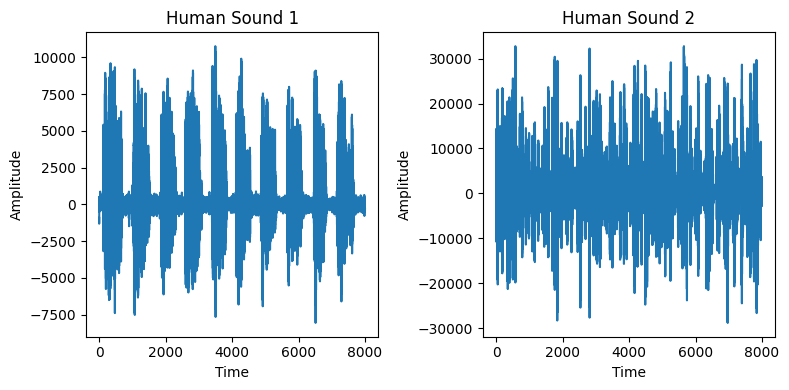

In [8]:
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.plot(time1, left1)
plt.ylabel("Amplitude")
plt.title("Human Sound 1")
plt.xlabel("Time")

plt.subplot(1,2,2)
plt.plot(time2, l)
plt.ylabel("Amplitude")
plt.title("Human Sound 2")
plt.xlabel("Time")

plt.tight_layout()

plt.show()

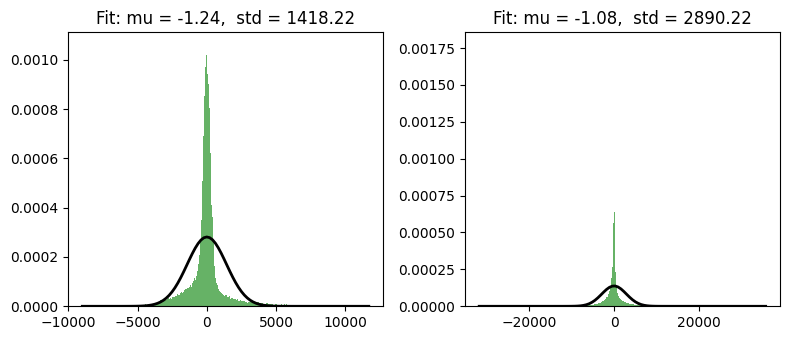

In [11]:
from scipy.stats import norm

plt.figure(figsize=(8, 3.5))

plt.subplot(1,2,1)
# Assuming `audio_signal` contains your signal data
# Plot histogram
plt.hist(left1, bins=1000, density=True, alpha=0.6, color='g')

# Plot the normal distribution for comparison
mu, std = norm.fit(left1)  # Fit a normal distribution to the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

# plt.xlim([-10000, -5000])
# plt.ylim([0, 0.00001])

plt.subplot(1,2,2)
# Assuming `audio_signal` contains your signal data
# Plot histogram
plt.hist(left2, bins=1000, density=True, alpha=0.6, color='g')

# Plot the normal distribution for comparison
mu, std = norm.fit(left2)  # Fit a normal distribution to the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import kurtosis
signal_kurtosis = kurtosis(left1)

print(f"Kurtosis: {signal_kurtosis}")

# Interpretation:
if signal_kurtosis > 3:
    print("Signal 1: Super-Gaussian signal")
elif signal_kurtosis < 3:
    print("Sub-Gaussian signal (flatter distribution)")
else:
    print("Gaussian signal")

Kurtosis: 7.332747803807099
Signal 1: Super-Gaussian signal


In [11]:
# plt.plot(right1, "r.")
# plt.ylabel("Amplitude")

In [12]:
# plt.plot(left1, 'r.')
# plt.plot(left1 - right1, 'b.')

In [13]:
print("The shape of left1 is:", left1.shape)
print("The shape of left2 is:", left2.shape)

The shape of left1 is: (268985,)
The shape of left2 is: (408226,)


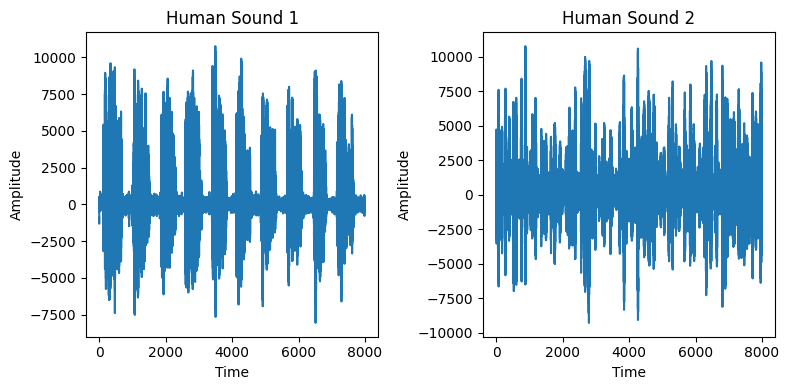

In [14]:
left2 = left2[:left1.shape[0]]

left2 = left2/np.max(left2) * np.max(left1) # here because left1 is smaller, that's why

plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.plot(time1, left1)
plt.ylabel("Amplitude")
plt.title("Human Sound 1")
plt.xlabel("Time")

plt.subplot(1,2,2)
plt.plot(time1, left2)
plt.ylabel("Amplitude")
plt.title("Human Sound 2")
plt.xlabel("Time")

plt.tight_layout()

plt.show()

## Algorithm

In [15]:
s = np.array([left1, left2])
print(s.shape)

(2, 268985)


In [16]:
A = np.array([[0.5, 0.5], [-0.4, 1]]) # A is the mixing matrix
print("The mixing matrix is: ")
print(A)

The mixing matrix is: 
[[ 0.5  0.5]
 [-0.4  1. ]]


In [17]:
x = np.dot(A, s)
p = np.max(x)
x = x/np.max(x)
print(x.shape)
np.transpose(x).shape
print(x)

(2, 268985)
[[-0.03888135 -0.05547224 -0.04522962 ... -0.01371377 -0.01334279
  -0.01246584]
 [ 0.02811871  0.04044637  0.03039997 ...  0.01059299  0.01018281
   0.00963245]]


In [18]:
def entropy_calculator (signal, n_bins):
    hist, bin_edges = np.histogram(signal, bins=n_bins, density=True)
    probability_distribution = hist * np.diff(bin_edges)
    signal_entropy = entropy(probability_distribution)
    return signal_entropy

difference of entropies is: -0.015279360785509732
difference of entropies is: 0.30167213161911643
difference of entropies is: 0.3480705575089349
difference of entropies is: 0.38221962259282805
difference of entropies is: 0.3989840945721248
difference of entropies is: 0.3964375445184114
difference of entropies is: 0.4066326195117238
difference of entropies is: 0.41005955424169827
difference of entropies is: 0.43442049759614676


Text(0, 0.5, '$\\Delta$ Entropy')

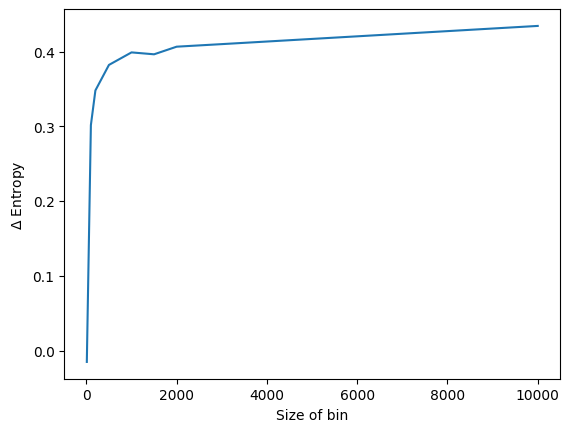

In [19]:
signals = [left1, left2, x[0, :], x[1, :]]
entropies = []
delta_s = []

bin_size = [10, 100, 200, 500, 1000, 1500, 2000, 3000, 10000]
for bin_s in bin_size:
    entropies = []
    for signal in signals:
        entropies.append(entropy_calculator(signal, bin_s))
    print("difference of entropies is:",  entropies[2] + entropies[3] - (entropies[0] + entropies[1]))
    delta_s.append(entropies[2] + entropies[3] - (entropies[0] + entropies[1]))

plt.plot(bin_size, delta_s)
plt.xlabel("Size of bin")
plt.ylabel("$\Delta$ Entropy")

In [20]:
x[0, :]

array([-0.03888135, -0.05547224, -0.04522962, ..., -0.01371377,
       -0.01334279, -0.01246584])

In [21]:
W = np.random.random((2,2))
bias = np.random.random(x.shape) # np.transpose(np.ones(2))
print(W)
print(bias)
print(bias.shape)
print(np.ones(2).shape)

[[0.52768167 0.48468301]
 [0.96833842 0.79449159]]
[[0.52693066 0.29234333 0.46759778 ... 0.47863429 0.33274043 0.92157409]
 [0.09892818 0.1100899  0.2125427  ... 0.54502924 0.25855816 0.33312006]]
(2, 268985)
(2,)


In [22]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [23]:
alpha = 0.001

W = np.random.random((2,2))
bias = np.ones(x.shape)

for i in range(1000):
    y = sigmoid(np.dot(W, x)+ bias)

    W = W + alpha*(np.linalg.inv(np.transpose(W)) + np.dot((np.ones(y.shape) - 2*y), np.transpose(x)))
    bias = bias + (np.ones(y.shape) - 2*y)

print(W)

[[ 0.91103132 -0.27279897]
 [ 0.35890038  0.76866246]]


In [24]:
print(A)

[[ 0.5  0.5]
 [-0.4  1. ]]


In [25]:
W@A

array([[ 0.56463525,  0.18271669],
       [-0.12801479,  0.94811265]])

In [26]:
s_hat = np.dot(W, x)

s1 = s_hat[0, :]
s2 = s_hat[1, :]

difference of entropies is: 0.07086874252140918
difference of entropies is: -0.024290838679053017
difference of entropies is: -0.01740945112172909
difference of entropies is: -0.02641222286018774
difference of entropies is: -0.02749329884992413
difference of entropies is: -0.02778409436939988
difference of entropies is: -0.028057427813132918
difference of entropies is: -0.028479854674790417
difference of entropies is: -0.03231743505979523


Text(0, 0.5, '$\\Delta$ Entropy')

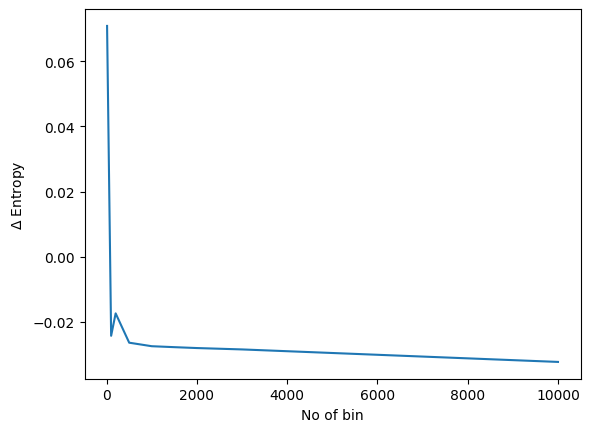

In [27]:
signals = [x[0, :], x[1, :], s1, s2]
entropies = []
delta_s = []

bin_size = [10, 100, 200, 500, 1000, 1500, 2000, 3000, 10000]
for bin_s in bin_size:
    entropies = []
    for signal in signals:
        entropies.append(entropy_calculator(signal, bin_s))
    print("difference of entropies is:",  entropies[2] + entropies[3] - (entropies[0] + entropies[1]))
    delta_s.append(entropies[2] + entropies[3] - (entropies[0] + entropies[1]))

plt.plot(bin_size, delta_s)
plt.xlabel("No of bin")
plt.ylabel("$\Delta$ Entropy")

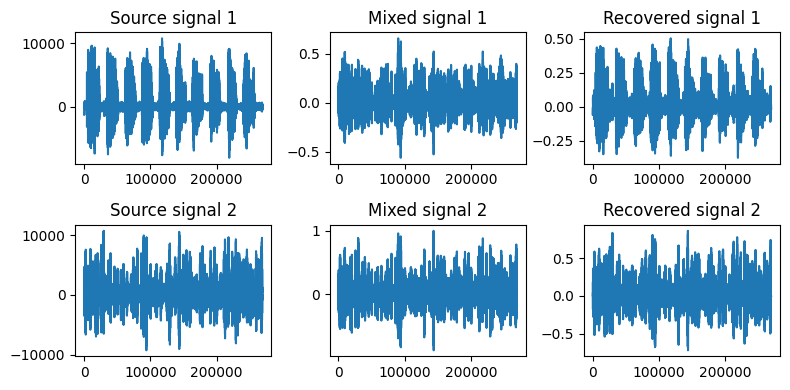

In [28]:
plt.figure(figsize=(8, 4))

plt.subplot(2,3,1)
plt.plot(left1)
plt.title("Source signal 1")

plt.subplot(2,3,2)
plt.plot(x[0, :])
plt.title("Mixed signal 1")

plt.subplot(2,3,3)
plt.plot(s1)
plt.title("Recovered signal 1")

plt.subplot(2,3,4)
plt.plot(left2)
plt.title("Source signal 2")

plt.subplot(2,3,5)
plt.plot(x[1, :])
plt.title("Mixed signal 2")

plt.subplot(2,3,6)
plt.plot(s2)
plt.title("Recovered signal 2")

plt.tight_layout()

In [47]:
min_left1 = np.max(left1)
toadd_left1 = np.abs(min_left1) + 1

min_left2 = np.max(left2)
toadd_left2 = np.abs(min_left2) + 1

log_left1 = np.log(left1 + toadd_left1)
log_left2 = np.log(left2 + toadd_left2)

log_s = np.array([log_left1, log_left2])
log_x = np.dot(A, log_s)

alpha = 0.001

W = np.random.random((2,2))
bias = np.ones(x.shape)

for i in range(1000):
    y = sigmoid(np.dot(W, x)+ bias)

    W = W + alpha*(np.linalg.inv(np.transpose(W)) + np.dot((np.ones(y.shape) - 2*y), np.transpose(x)))
    bias = bias + (np.ones(y.shape) - 2*y)

print(W)
print(W@A)

[[ 0.43373218  0.7844367 ]
 [ 0.94482816 -0.29165496]]
[[-0.09690859  1.00130279]
 [ 0.58907606  0.18075913]]


In [48]:
log_s_hat = np.dot(W, log_x)

log_s1 = log_s_hat[0, :]
log_s2 = log_s_hat[1, :]

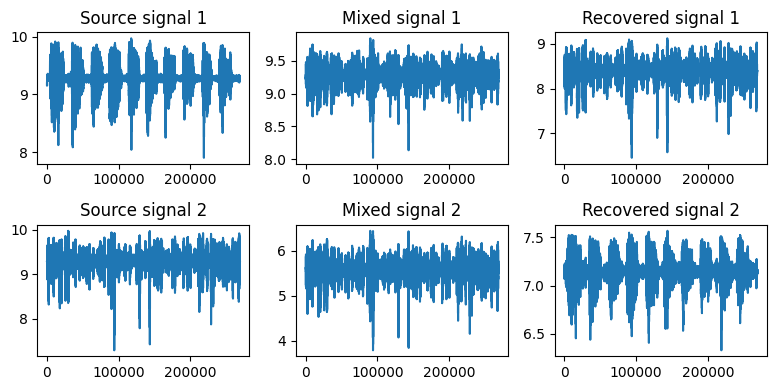

In [49]:
plt.figure(figsize=(8, 4))

plt.subplot(2,3,1)
plt.plot(log_left1)
plt.title("Source signal 1")

plt.subplot(2,3,2)
plt.plot(log_x[0, :])
plt.title("Mixed signal 1")

plt.subplot(2,3,3)
plt.plot(log_s1)
plt.title("Recovered signal 1")

plt.subplot(2,3,4)
plt.plot(log_left2)
plt.title("Source signal 2")

plt.subplot(2,3,5)
plt.plot(log_x[1, :])
plt.title("Mixed signal 2")

plt.subplot(2,3,6)
plt.plot(log_s2)
plt.title("Recovered signal 2")

plt.tight_layout()

In [32]:
time3 = np.linspace(0., s1.shape[0]/rate1, s1.shape[0])
time3.shape

(268985,)

In [33]:
# Create your data (replace with your actual data)
data = {'Time': time3, 'Amplitude': s2}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
df.to_csv('output.csv', index=False)

print("CSV file saved successfully.")

from scipy.io.wavfile import write

# Load the time and amplitude data
# Assuming your data is in a CSV format with columns 'time' and 'amplitude'
data = pd.read_csv('output.csv')

# Extract the amplitude (the second column)
amplitude = data['Amplitude'].values

# Define the sampling rate (example: 44.1 kHz, commonly used in audio)
sampling_rate = rate1  # Adjust according to your data

# Normalize amplitude data to the range (-32767, 32767) for 16-bit PCM format
normalized_amplitude = np.int16(amplitude / np.max(np.abs(amplitude)) * 32767)

# Save as a .wav file
write('recover_2.wav', sampling_rate, normalized_amplitude)

print("WAV file created successfully.")


CSV file saved successfully.
WAV file created successfully.


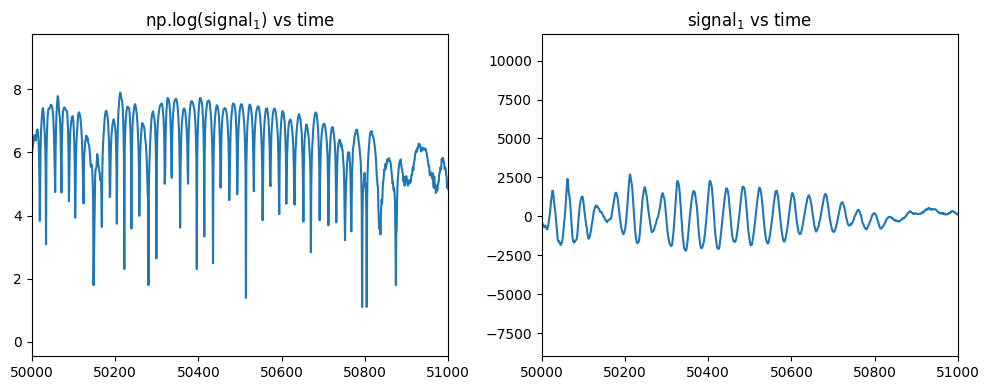

In [35]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
plt.plot(np.log(np.abs(left1)))
plt.xlim([50000, 51000])
plt.title("np.log(signal$_1$) vs time")

plt.subplot(1,2,2)
plt.plot(left1)
plt.xlim([50000, 51000])
plt.title("signal$_1$ vs time")

plt.tight_layout()

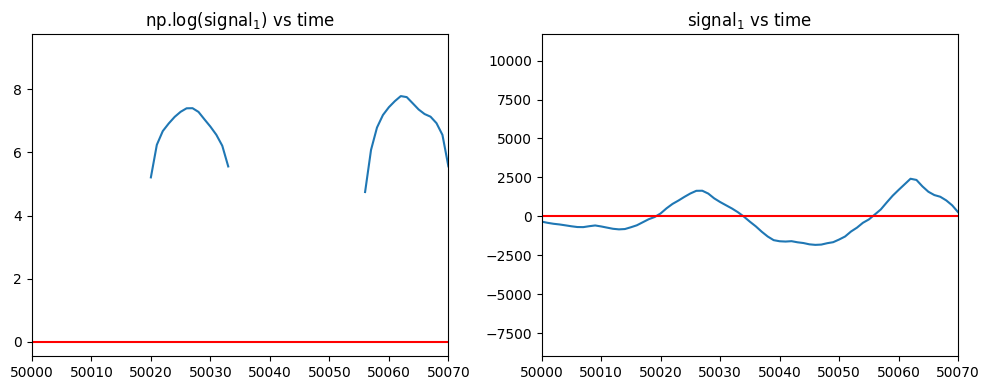

In [36]:
# plt.plot(left1)
# plt.xlim([50050, 50070])

plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
plt.plot(np.log(left1))
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlim([50000, 50070])
plt.title("np.log(signal$_1$) vs time")

plt.subplot(1,2,2)
plt.plot(left1)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlim([50000, 50070])
plt.title("signal$_1$ vs time")

plt.tight_layout()

(50000.0, 50070.0)

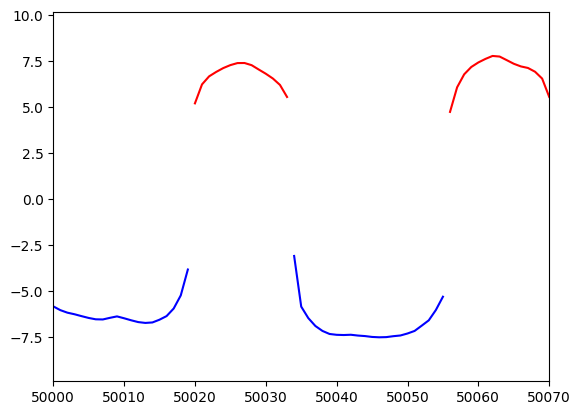

In [37]:
plt.plot(-np.log(-left1), color = 'b')
plt.plot(np.log(left1), color = 'r')
plt.xlim([50000, 50070])

## Different mixing matrices

In [38]:
cond_W = []
cost = []

for i in range(100):
    A_mixing = np.random.uniform(-1, 1, (2, 2))
    x_mix = np.dot(A_mixing, s)

    alpha = 0.001

    W = np.random.random((2,2))
    bias = np.ones(x.shape)

    for i in range(100):
        y = sigmoid(np.dot(W, x)+ bias)

        W = W + alpha*(np.linalg.inv(np.transpose(W)) + np.dot((np.ones(y.shape) - 2*y), np.transpose(x)))
        bias = bias + (np.ones(y.shape) - 2*y)

    cond_W.append(np.linalg.cond(W))
    cost.append(1 - np.abs(np.linalg.det(W@A)))
    

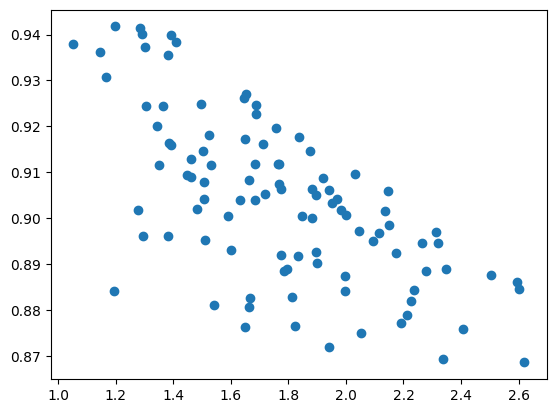

In [39]:
plt.scatter(cond_W, cost)

In [40]:
r2_score(cond_W, cost)

-5.93907527305599

In [41]:
cond_W = []
det_W = []
cost = []
norm_diff = []

A_mixing = np.random.uniform(-1, 1, (2, 2))
x_mix = np.dot(A_mixing, s)

alpha = 0.001

for i in range(100):
    W = np.random.random((2,2))
    W_ini = W
    bias = np.ones(x.shape)

    for i in range(100):
        y = sigmoid(np.dot(W, x)+ bias)

        W = W + alpha*(np.linalg.inv(np.transpose(W)) + np.dot((np.ones(y.shape) - 2*y), np.transpose(x)))
        bias = bias + (np.ones(y.shape) - 2*y)

    norm_diff.append(np.abs(np.linalg.norm(W_ini@A - W@A)))
    cond_W.append(np.linalg.cond(W))
    cost.append(1 - np.abs(np.linalg.det(W@A)))
    det_W.append(np.linalg.det(W))
    

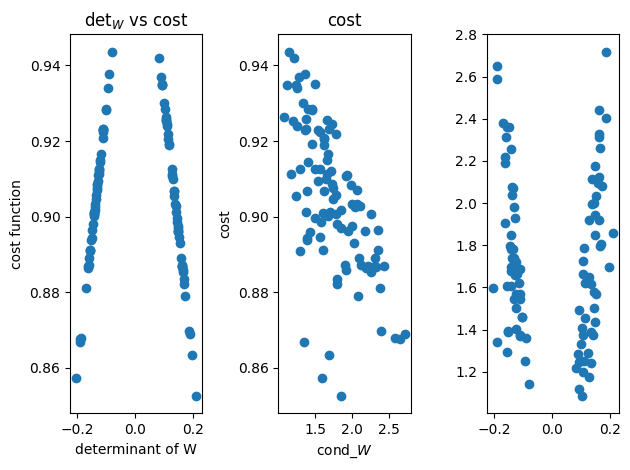

In [42]:
# df = pd.DataFrame([np.transpose(cond_W),np.transpose(cost), np.transpose(det_W)])
# df = np.transpose(df)
# fd = sns.pairplot(df)

plt.subplot(1,3,1)
plt.scatter(det_W, cost)
plt.xlabel("determinant of W")
plt.ylabel("cost function")
plt.title("det$_W$ vs cost")

plt.subplot(1,3,2)
plt.scatter(cond_W, cost)
plt.xlabel("cond_$W$")
plt.ylabel("cost")
plt.title("cost")

plt.subplot(1,3,3)
plt.scatter(det_W, cond_W)
plt.xlabel("")
plt.ylabel("")
plt.title("")

plt.tight_layout()

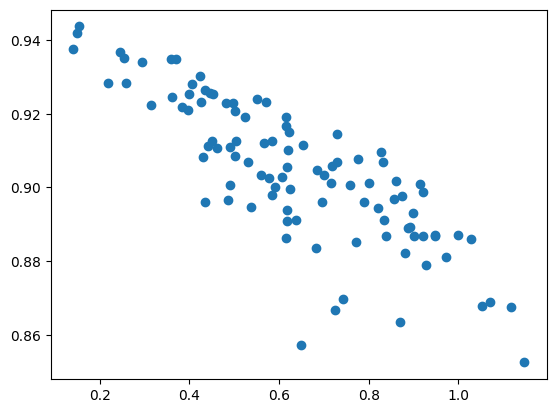

In [43]:
plt.scatter((norm_diff), cost)

In [44]:
r2_score(norm_diff, cost)

-1.5253564345674642

In [45]:
np.ones(np.size(cost))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])